In [2]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


# Linear Interpolation


In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [ ]:
f = interp1d(x,y)

x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print (y_ask)

4.699999999999999


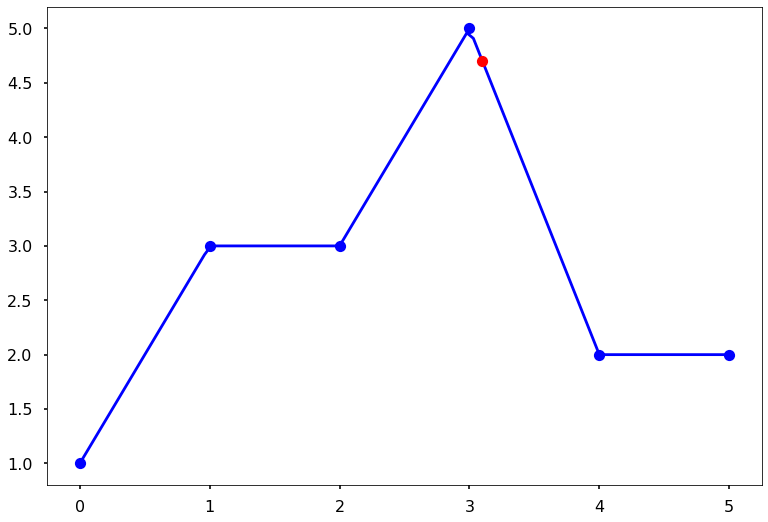

In [ ]:
plt.plot(x,y,'ob')
plt.plot(x_lin,y_lin,'b')
plt.plot(3.1,f(3.1),'ro')
plt.show()

#Newton Interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

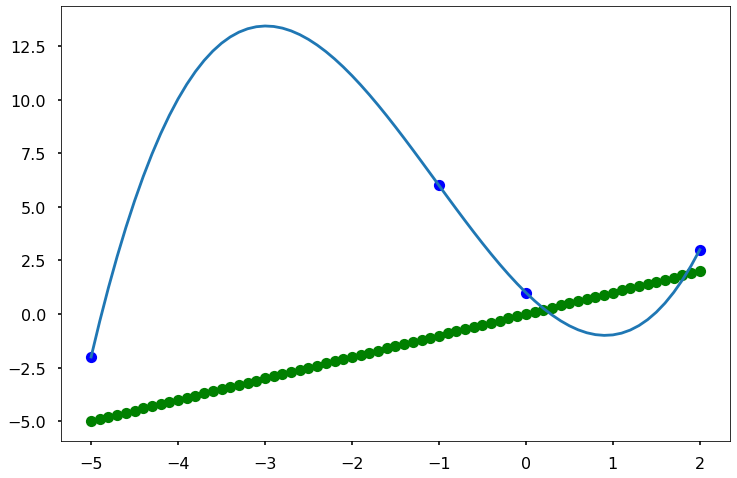

In [ ]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, x_new, 'go')
plt.plot(x_new, y_new)

### Least-Square Linier Regression

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.49499389]
 [0.99316105]]


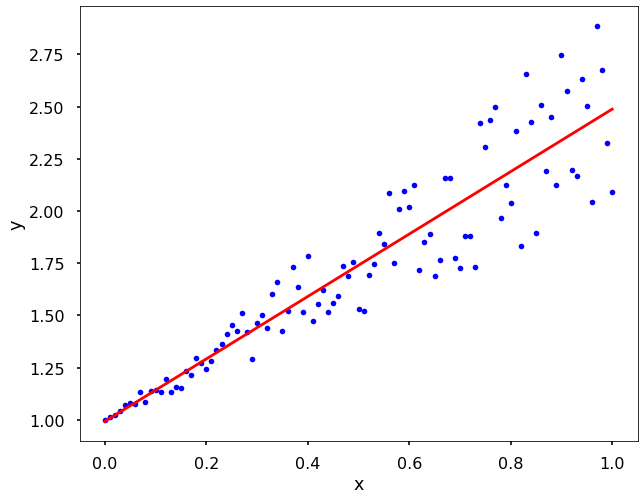

In [ ]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use np.linalg.pinv to find Linier Regression

In [ ]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.49499389]
 [0.99316105]]


Use np.linalg to find Linier Regression

In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.49499389]
 [0.99316105]]


use optimize.curve_fit

In [ ]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[1.49913451 0.98910921]


# Cubic Spline Interpolation

In [ ]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [ ]:
f = CubicSpline(x,y,bc_type='natural')

x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print (y_ask)

5.000368421052631


In [1]:
plt.plot(x,y,'bo')
plt.plot(x_cub,y_cub,'b')
plt.plot(2.9,f(2.9),'ro')
plt.show()

NameError: ignored